Lemma text & manual stop word removal using nltk
Tried stemming but results were not easily interpretable

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pickle
import pandas as pd

PATH_DF = '/content/gdrive/MyDrive/Data Mining/english_cleaned_lyrics.csv' # change this to your dir
PATH_CORRECTION = '/content/gdrive/MyDrive/Data Mining/indx2newdate.p'


def load_dataset(data_path, path_correction):
    df = pd.read_csv(data_path)
    indx2newdate = pickle.load(open(PATH_CORRECTION, 'rb'))
    df['year'] = df['index'].apply(lambda x: int(indx2newdate[x][0][:4]) if indx2newdate[x][0] != '' else 0)
    return df[df.year > 1960][['song', 'year', 'artist', 'genre', 'lyrics']]

df = load_dataset(PATH_DF, PATH_CORRECTION)

In [ ]:
lyrics = df.loc[(df['genre'].isin(['Pop','Hip-Hop'])) & (df["year"] > 1989)]

In [ ]:
import nltk 
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

def tokenize(text):
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    for punctuation in punctuations:
        text = text.replace(punctuation, '')
    text = text.lower() 
    text = text.split()
    return text

In [ ]:
tokenized_texts = [tokenize(text) for text in lyrics['lyrics']]

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))

filtered_tokens = [[token for token in doc if token not in stops] for doc in tokenized_texts]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokens_list = [word for doc in filtered_tokens for word in doc]
filtered_word_freq = nltk.FreqDist(tokens_list)

In [ ]:
filtered_word_freq.most_common(300)

[('im', 130931),
 ('like', 90344),
 ('dont', 78798),
 ('know', 75005),
 ('get', 67321),
 ('love', 65110),
 ('got', 61971),
 ('oh', 49673),
 ('go', 42648),
 ('cause', 41373),
 ('see', 39562),
 ('want', 37688),
 ('yeah', 37439),
 ('one', 37250),
 ('baby', 36921),
 ('aint', 36759),
 ('time', 34402),
 ('never', 34378),
 ('youre', 34173),
 ('cant', 33748),
 ('let', 33063),
 ('make', 33012),
 ('back', 32332),
 ('come', 30608),
 ('say', 30256),
 ('way', 28142),
 ('nigga', 27201),
 ('take', 26482),
 ('thats', 25430),
 ('ill', 25287),
 ('right', 24744),
 ('wanna', 24520),
 ('need', 23626),
 ('ya', 23603),
 ('feel', 23134),
 ('girl', 23002),
 ('shit', 22947),
 ('man', 22726),
 ('life', 22564),
 ('tell', 22352),
 ('keep', 20163),
 ('niggas', 19896),
 ('give', 19883),
 ('gonna', 19578),
 ('fuck', 18507),
 ('could', 18467),
 ('day', 17158),
 ('em', 16967),
 ('think', 16849),
 ('heart', 16751),
 ('still', 16693),
 ('gotta', 16572),
 ('night', 16074),
 ('good', 15956),
 ('yo', 15594),
 ('away', 15418

In [ ]:
targeted_stop = ["im","na","da","uh","yall","la","yo","us","em","ive","ya","ill","oh","im","youll","gon","ooh","la"
                  "huh", "ha","ima","ah","youve","id","shes", "na", "da","chorus", "2", "1", "verse", "3", "repeat", "4", "2x",
                 'ooh','yeah','hey','whoa','woah', 'ohh', 'was', 'mmm', 'oooh','yah','yeh','mmm', 'hmm','deh','doh','jah','wa',
                 "yeah", "ay", "ba", "huh", "aye", "dah"]


In [ ]:
filtered_tokens_2 = [[token for token in doc if token not in targeted_stop] for doc in filtered_tokens]

In [ ]:
#stemmer = PorterStemmer()
#stemmed_text = [[stemmer.stem(token) for token in doc] for doc in filtered_tokens_2]

In [ ]:
# Create a dictionary and filter out the words that occur less than three times, and all words that occur in over 85% of the documents.
from gensim.corpora import Dictionary

MIN_DF = 5
MAX_DF = 0.85


dictionary = Dictionary(filtered_tokens_2)
dictionary.filter_extremes(no_below=MIN_DF,no_above=MAX_DF)
corpus = [dictionary.doc2bow(text) for text in filtered_tokens_2]

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-01-31 18:53:24--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-01-31 18:53:24--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.00MB/s    in 1.7s    

2022-01-31 18:53:26 (9.00 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [ ]:
import os
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

os.environ['MALLET HOME'] = '/content/mallet-2.0.8'

PATH_TO_MALLET = '/content/mallet-2.0.8/bin/mallet'

N_ITERATIONS = 1000 

#this function is a modified version of the function used in the following tutorial
#https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Evaluate%20Topic%20Models.ipynb

#create a function that trains a model with k topics and then calculates the coherence of that model, returning the coherence
def compute_coherence_values(corpus, dictionary, k):
    
    lda_model = LdaMallet(PATH_TO_MALLET,
                                           corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           optimize_interval=10,
                                           iterations=N_ITERATIONS)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_tokens_2, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
from tqdm.auto import tqdm

min_topics = 10
max_topics = 50
steps = 10

#run the above function in a loop to calculate the coherence for a range of topic numbers from 10 to 50 at intervals of 10. 
#return the number of topics and the coherence to compare the performance of a range of models 
result = []
for n_topic in tqdm(range(min_topics,max_topics,steps)):
    coh = compute_coherence_values(corpus,dictionary,n_topic)
    result.append([n_topic,coh])
    
results_df_v2 = pd.DataFrame(result, columns = ['Number of Topics', 'Coherence'])

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
results_df_v2.sort_values(by='Coherence',ascending = False)

,Number of Topics,Coherence
0,10,0.434833
2,30,0.433215
1,20,0.430651
3,40,0.414101


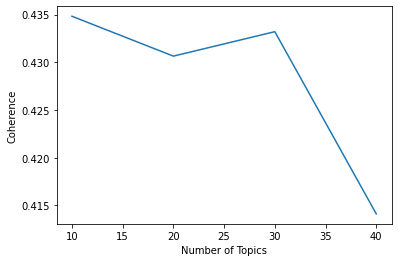

In [ ]:
import matplotlib.pyplot as plt

plt.plot(results_df_v2['Number of Topics'],results_df_v2['Coherence'])
plt.xlabel('Number of Topics')
plt.ylabel('Coherence');

In [ ]:
lda20 = LdaMallet(PATH_TO_MALLET,corpus=corpus, id2word=dictionary,
                                           num_topics=20, 
                                           optimize_interval=10,
                                           iterations=N_ITERATIONS)

In [ ]:
# The ten most relevant words for each topic
N_TOPICS = 20

for TOPIC in range(N_TOPICS):
  words = lda20.show_topic(TOPIC, 10)
  topic_n_words = ' '.join([word[0] for word in words])
  print('Topic {}: {}'.format(str(TOPIC), topic_n_words))

Topic 0: ride wit yea big bounce roll dirty back side city
Topic 1: nigga niggas shit fuck bitch ass aint dont niggaz fuckin
Topic 2: money aint nigga bitch shit niggas fuck dont bitches bout
Topic 3: dem mi di christmas yuh nah man fi gal dat
Topic 4: god lord heaven sing soul jesus born pray king holy
Topic 5: time back didnt thought made things remember long knew told
Topic 6: dont wanna gonna make gotta aint give wont youre stop
Topic 7: good man boy girl hes bad girls call youre boys
Topic 8: life world day live time people make change free living
Topic 9: baby youre girl tonight crazy wanna night alright make gonna
Topic 10: girl make put body wanna shake work hot baby drop
Topic 11: aint goin gettin gotta tryin nothin man back lookin bout
Topic 12: back man dont big put shit black face car white
Topic 13: rap back shit check make rock mic flow dont style
Topic 14: love feel give heart hold make baby youre true forever
Topic 15: youre heart feel eyes find inside fall dont hold wo

In [ ]:
N_TOPICS = 20

transformed_docs = lda20.load_document_topics()
topic_distributions = pd.DataFrame([[x[1] for x in doc] for doc in transformed_docs], 
             columns=['topic_{}'.format(i) for i in range(N_TOPICS)])
topic_distributions.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0.000370,0.008031,0.000689,0.000147,0.000511,0.001506,0.360873,0.088642,0.001095,0.000734,0.000518,0.000890,0.345720,0.000640,0.089142,0.052937,0.030361,0.008459,0.008197,0.000537
1,0.001064,0.002015,0.001983,0.000423,0.128015,0.278511,0.004814,0.001942,0.003151,0.023202,0.001490,0.002560,0.151034,0.001843,0.087742,0.278848,0.002988,0.003247,0.002494,0.022635
2,0.000584,0.001106,0.001088,0.000232,0.000807,0.002377,0.002641,0.001066,0.013301,0.001158,0.000818,0.059265,0.025009,0.001011,0.499457,0.291866,0.001640,0.001781,0.001368,0.093425
3,0.010060,0.010492,0.020055,0.000192,0.000668,0.001967,0.452316,0.115809,0.011008,0.029690,0.019831,0.001162,0.078161,0.000837,0.240965,0.002120,0.001357,0.001474,0.001132,0.000701
4,0.000300,0.018381,0.000558,0.000119,0.000414,0.007157,0.179487,0.000547,0.000887,0.160913,0.000419,0.000721,0.000957,0.000519,0.000951,0.304139,0.131472,0.000914,0.190710,0.000435


In [ ]:
jtd = lyrics.reset_index().join(topic_distributions)

In [ ]:
grouped_by_year = jtd.groupby(['year','genre']).mean()
grouped_by_year = grouped_by_year.reset_index()
grouped_by_year = grouped_by_year.drop('index',axis =1)
grouped_by_year['distribution'] = grouped_by_year[grouped_by_year.columns[2:23]].values.tolist()
grouped_by_year.head()


,year,genre,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19,distribution
0,1990,Hip-Hop,0.006298,0.080368,0.009310,0.003193,0.026653,0.049820,0.051548,0.038991,0.021554,0.020563,0.025496,0.057973,0.095495,0.267299,0.024050,0.048932,0.014950,0.010324,0.112927,0.034256,"[0.006297683984648791, 0.08036848531793522, 0...."
1,1990,Pop,0.006511,0.004382,0.006160,0.009511,0.040645,0.129323,0.089973,0.030030,0.079089,0.034810,0.008304,0.018789,0.032287,0.017223,0.125255,0.155790,0.039202,0.104387,0.042555,0.025777,"[0.006511124945570709, 0.004381806561761589, 0..."
2,1991,Hip-Hop,0.008401,0.152713,0.024345,0.005778,0.008419,0.040395,0.050245,0.046260,0.019674,0.019042,0.034643,0.073466,0.147292,0.204621,0.016541,0.022757,0.021237,0.017889,0.065474,0.020808,"[0.008400659851143357, 0.1527132609716901, 0.0..."
3,1991,Pop,0.009625,0.006015,0.007780,0.014666,0.037159,0.099637,0.071277,0.032666,0.080732,0.039012,0.012198,0.012217,0.042853,0.014297,0.133558,0.136860,0.049621,0.126241,0.047380,0.026205,"[0.009624897533796799, 0.006014706303011694, 0..."
4,1992,Hip-Hop,0.016212,0.172117,0.015368,0.013317,0.021319,0.031769,0.052932,0.029312,0.021387,0.019216,0.029189,0.059724,0.107115,0.221883,0.008101,0.024019,0.028784,0.020201,0.086476,0.021559,"[0.016211891325110306, 0.17211693974730308, 0...."


In [ ]:
from scipy.spatial import distance

year = grouped_by_year["year"].unique()
js = []
for current_year in year:
  subset = grouped_by_year[grouped_by_year.year == current_year]
  distributions = subset.distribution.values
  x = distance.jensenshannon(distributions[0],distributions[1])
  sx=x**2
  js.append([current_year,sx])

df_js = pd.DataFrame(js, columns = ['year','JS_Metric'])
print(df_js)

    year  JS_Metric
0   1990   0.193247
1   1991   0.224971
2   1992   0.237827
3   1993   0.284508
4   1994   0.221252
5   1995   0.258034
6   1996   0.179710
7   1997   0.243949
8   1998   0.207550
9   1999   0.197367
10  2000   0.221181
11  2001   0.188371
12  2002   0.157826
13  2003   0.161730
14  2004   0.188565
15  2005   0.133744
16  2006   0.168342
17  2007   0.151045
18  2008   0.125899
19  2009   0.130499
20  2010   0.101488
21  2011   0.105149
22  2012   0.121445
23  2013   0.123508
24  2014   0.104322
25  2015   0.153014
26  2016   0.119945
27  2017   0.143959
28  2018   0.133758
29  2019   0.129108
30  2020   0.125760


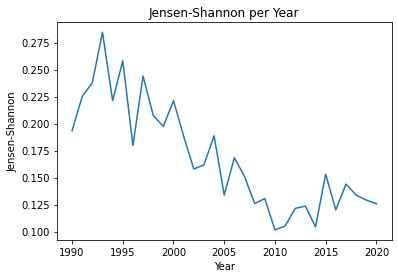

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df_js.year,df_js.JS_Metric)
plt.title('Jensen-Shannon per Year')
plt.xlabel('Year')
plt.ylabel('Jensen-Shannon');

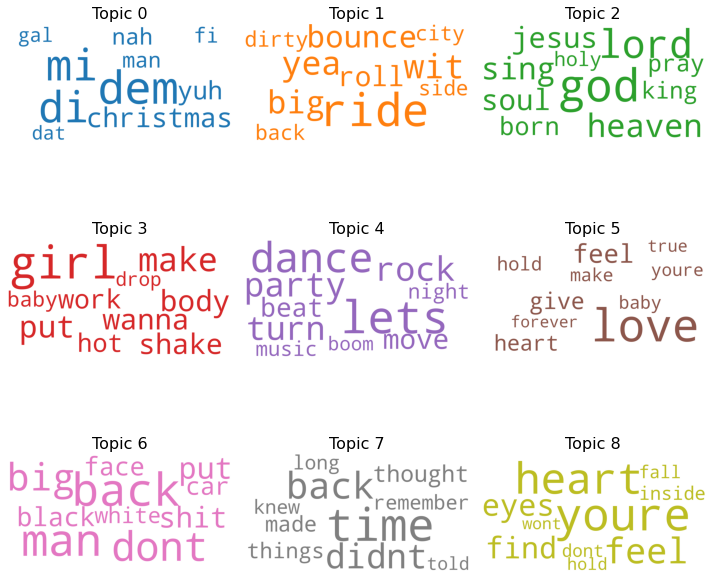

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stops,
                  background_color='white',
                  width=1500,
                  height=800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda20.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
grouped_by_genre = jtd.groupby('genre').mean()
grouped_by_genre = grouped_by_genre.reset_index()
grouped_by_genre = grouped_by_genre.drop('index',axis =1)
grouped_by_genre

,genre,year,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,Hip-Hop,2006.487252,0.035476,0.125332,0.106212,0.017823,0.024418,0.046456,0.056922,0.024941,0.034531,0.024479,0.042081,0.075053,0.096944,0.080878,0.027346,0.035714,0.032122,0.025206,0.064357,0.023707
1,Pop,2006.549542,0.009619,0.006641,0.011175,0.012837,0.038441,0.107307,0.094845,0.036973,0.067107,0.051177,0.021611,0.021086,0.040760,0.010885,0.097215,0.147430,0.059963,0.095421,0.035866,0.033640


In [ ]:
grouped_by_genre[grouped_by_genre['genre'] == 'Pop'].mean().sort_values(ascending=False)

year        2006.549542
topic_15       0.147430
topic_5        0.107307
topic_14       0.097215
topic_17       0.095421
topic_6        0.094845
topic_8        0.067107
topic_16       0.059963
topic_9        0.051177
topic_12       0.040760
topic_4        0.038441
topic_7        0.036973
topic_18       0.035866
topic_19       0.033640
topic_10       0.021611
topic_11       0.021086
topic_3        0.012837
topic_2        0.011175
topic_13       0.010885
topic_0        0.009619
topic_1        0.006641
dtype: float64

In [ ]:
grouped_by_genre[grouped_by_genre['genre'] == 'Hip-Hop'].mean().sort_values(ascending=False)

year        2006.487252
topic_1        0.125332
topic_2        0.106212
topic_12       0.096944
topic_13       0.080878
topic_11       0.075053
topic_18       0.064357
topic_6        0.056922
topic_5        0.046456
topic_10       0.042081
topic_15       0.035714
topic_0        0.035476
topic_8        0.034531
topic_16       0.032122
topic_14       0.027346
topic_17       0.025206
topic_7        0.024941
topic_9        0.024479
topic_4        0.024418
topic_19       0.023707
topic_3        0.017823
dtype: float64

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.3 MB 24.0 MB/s 
     |████████████████████████████████| 15.7 MB 45.8 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5ebf041d76efd765a39802d677be865320f2c060357cd288e7c952730e2f67d6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take in

In [ ]:
import gensim

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

lda_conv = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda20)

gensimvis.prepare(lda_conv, corpus, dictionary)

exception calling callback for <Future at 0x7f120361df90 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py", line 624, in wait_result_broken_or_wakeup
    result_item = result_reader.recv()
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 251, in recv
    return _ForkingPickler.loads(buf.getbuffer())
AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/usr/local/lib/python3.7/dist-packages/pandas/core/internals/blocks.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 359, in __call__
    sel

BrokenProcessPool: ignored

In [ ]:
import numpy as np

def get_trends(X,Y, order=1):
    result = np.polyfit(X, list(Y), order)
    slope = result[-2]
    return float(slope)

trends = []
for i in range(N_TOPICS):
    index = grouped_by_year.index.values
    topic_prop = grouped_by_year['topic_{}'.format(i)].values
    trend = get_trends(index, topic_prop)
    trends.append([i, trend])

trends_df = pd.DataFrame(trends, columns=['topic', 'trend'])
trends_df.sort_values('trend', ascending=True)

,topic,trend
13,13,-0.001661
1,1,-0.001233
18,18,-0.000376
11,11,-0.000317
14,14,-0.000248
12,12,-0.000154
4,4,-0.000011
3,3,-0.000007
8,8,0.000012
7,7,0.000046


In [ ]:
pip install csaps

In [ ]:
from csaps import csaps
import matplotlib.pyplot as plt

def smooth(x, y, smooth=0.95):
    xs = np.linspace(x[0], x[-1], 150)
    ys = csaps(x, y, xs, smooth=smooth)
    return xs, ys

In [ ]:
grouped_by_year2 = jtd.groupby(['year','genre']).mean()

In [ ]:
gby= grouped_by_year2.reset_index(level='genre')
gby

,genre,index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
year,,,,,,,,,,,,,,,,,,,,,,
1990,Hip-Hop,114850.087302,0.006298,0.080368,0.009310,0.003193,0.026653,0.049820,0.051548,0.038991,0.021554,0.020563,0.025496,0.057973,0.095495,0.267299,0.024050,0.048932,0.014950,0.010324,0.112927,0.034256
1990,Pop,115661.206107,0.006511,0.004382,0.006160,0.009511,0.040645,0.129323,0.089973,0.030030,0.079089,0.034810,0.008304,0.018789,0.032287,0.017223,0.125255,0.155790,0.039202,0.104387,0.042555,0.025777
1991,Hip-Hop,93332.565476,0.008401,0.152713,0.024345,0.005778,0.008419,0.040395,0.050245,0.046260,0.019674,0.019042,0.034643,0.073466,0.147292,0.204621,0.016541,0.022757,0.021237,0.017889,0.065474,0.020808
1991,Pop,110368.830565,0.009625,0.006015,0.007780,0.014666,0.037159,0.099637,0.071277,0.032666,0.080732,0.039012,0.012198,0.012217,0.042853,0.014297,0.133558,0.136860,0.049621,0.126241,0.047380,0.026205
1992,Hip-Hop,97817.376190,0.016212,0.172117,0.015368,0.013317,0.021319,0.031769,0.052932,0.029312,0.021387,0.019216,0.029189,0.059724,0.107115,0.221883,0.008101,0.024019,0.028784,0.020201,0.086476,0.021559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Pop,120716.538813,0.007589,0.006026,0.011038,0.023671,0.052448,0.107682,0.085420,0.046565,0.070091,0.063595,0.019504,0.023542,0.042745,0.015301,0.086513,0.125097,0.054519,0.101086,0.025173,0.032395
2019,Hip-Hop,110590.093458,0.026726,0.090749,0.118425,0.002824,0.024877,0.065921,0.074479,0.028984,0.036855,0.020357,0.043119,0.062155,0.091113,0.083179,0.033598,0.044186,0.041905,0.027194,0.065361,0.017991
2019,Pop,114745.946488,0.013818,0.005784,0.012771,0.016171,0.028676,0.115632,0.106829,0.029752,0.060740,0.058949,0.019340,0.019437,0.041791,0.010171,0.100606,0.135598,0.058400,0.099999,0.028946,0.036591


In [ ]:
gby.columns

Index(['genre', 'index', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16',
       'topic_17', 'topic_18', 'topic_19'],
      dtype='object')

In [ ]:
gby_pop = gby.loc[gby['genre']=='Pop']
gby_hh=gby.loc[gby['genre']=='Hip-Hop']

No handles with labels found to put in legend.


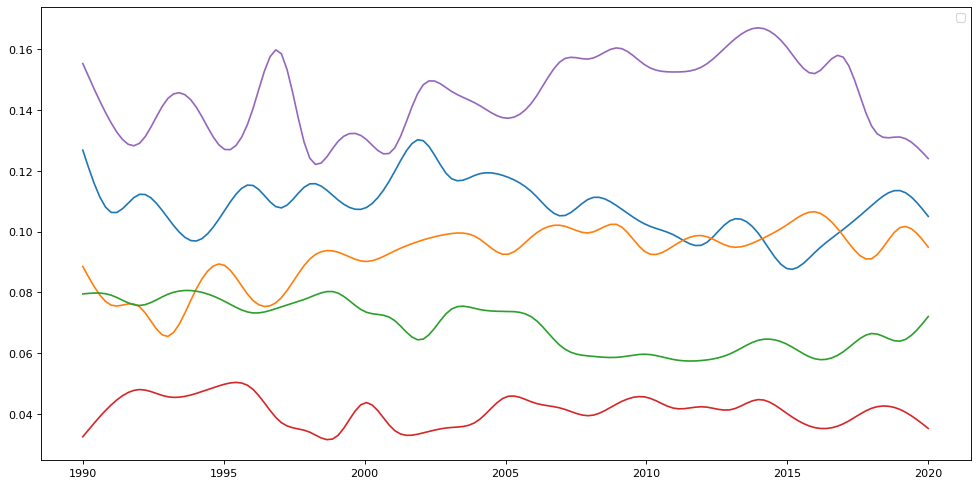

In [ ]:
TOPICS2PLOT = [5,6,8,12,15] 
labels = {5: 'Remembrance', 6: 'Unknown', 8:'Life', 12:'Unknown2', 15:'Heart'} # dictionary of topic labels

plt.figure(figsize=(15, 7.5), dpi=80)

for topic in TOPICS2PLOT:
    smooth_x, smooth_y = smooth(gby_pop.index, gby_pop['topic_{}'.format(topic)])
    plt.plot(smooth_x, smooth_y)

plt.legend()

No handles with labels found to put in legend.


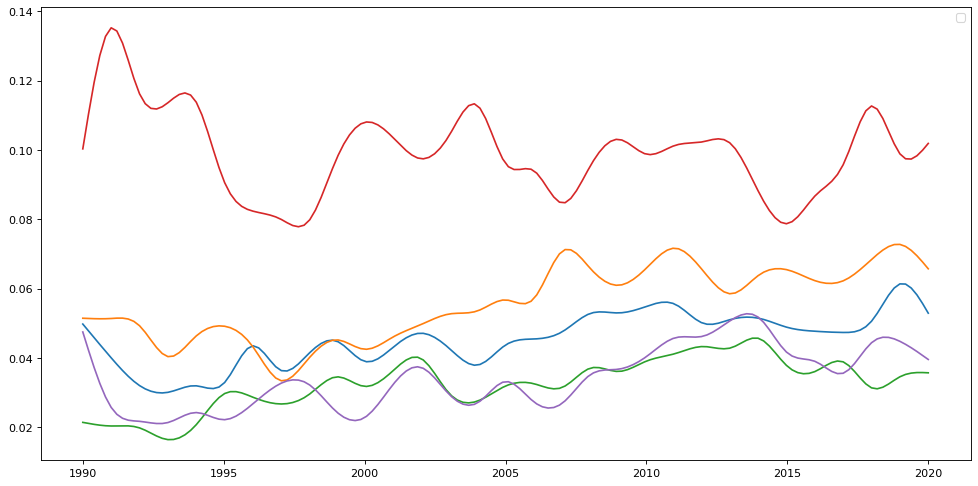

In [ ]:
TOPICS2PLOT = [5,6,8,12,15] 
labels = {5: 'Remembrance', 6: 'Unknown', 8:'Life', 12:'Unknown2', 15:'Heart'} # dictionary of topic labels

plt.figure(figsize=(15, 7.5), dpi=80)

for topic in TOPICS2PLOT:
    smooth_x, smooth_y = smooth(gby_hh.index, gby_hh['topic_{}'.format(topic)])
    plt.plot(smooth_x, smooth_y)

plt.legend()

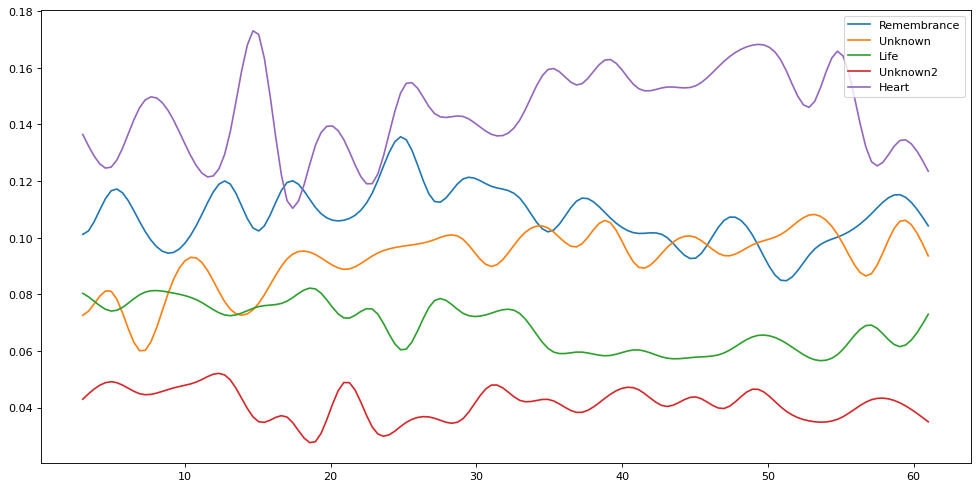

In [ ]:
TOPICS2PLOT = [5,6,8,12,15] 
labels = {5: 'Remembrance', 6: 'Unknown', 8:'Life', 12:'Unknown2', 15:'Heart'} # dictionary of topic labels

plt.figure(figsize=(15, 7.5), dpi=80)

for topic in TOPICS2PLOT:
    smooth_x, smooth_y = smooth(grouped_by_year_pop.index, grouped_by_year_pop['topic_{}'.format(topic)])
    plt.plot(smooth_x, smooth_y, label=labels[topic])

plt.legend()

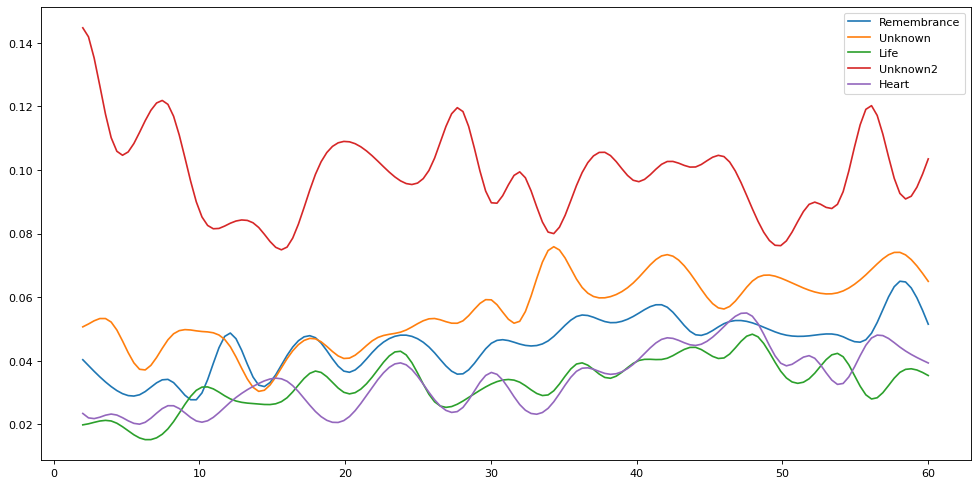

In [ ]:
TOPICS2PLOT = [5,6,8,12,15] 
labels = {5: 'Remembrance', 6: 'Unknown', 8:'Life', 12:'Unknown2', 15:'Heart'} # dictionary of topic labels

plt.figure(figsize=(15, 7.5), dpi=80)

for topic in TOPICS2PLOT:
    smooth_x, smooth_y = smooth(grouped_by_year_hh.index, grouped_by_year_hh['topic_{}'.format(topic)])
    plt.plot(smooth_x, smooth_y, label=labels[topic])

plt.legend()